In [ ]:
import pandas as pd
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sb

running_dataset = pd.read_csv("C:/Users/evaru/Downloads/EVOLVE/python/running-trends/data/running-trends-dataset.csv", sep=";")

running_dataset.info()
display(running_dataset.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Año                                                        1786 non-null   int64  
 1   CCAA                                                       1786 non-null   object 
 2   PIB_anual                                                  1786 non-null   float64
 3   PIB_capita                                                 1786 non-null   float64
 4   Renta media por persona (con alquiler imputado)            1292 non-null   float64
 5   Renta media por unidad de consumo                          1292 non-null   float64
 6   Renta media por unidad de consumo (con alquiler imputado)  1292 non-null   float64
 7   Renta neta media por persona                               1292 non-null   float64
 8   Total_pa

,Año,CCAA,PIB_anual,PIB_capita,Renta media por persona (con alquiler imputado),Renta media por unidad de consumo,Renta media por unidad de consumo (con alquiler imputado),Renta neta media por persona,Total_paro,busquedas_running
1205,2017,CastillaLaMancha,40.769,20.043,10.567,13.604,15.762,9.045,22.48,76.0
297,2005,Catalunya,174.584,25.141,NaN,NaN,NaN,NaN,7.79,90.0
1340,2019,Asturias,23.667,23.220,14.559,17.868,20.612,12.523,14.17,72.0
489,2007,PaisVasco,63.890,29.700,NaN,NaN,NaN,NaN,6.64,77.0
1014,2014,Navarra,17.642,27.704,14.862,19.550,21.814,13.221,14.92,76.0


In [19]:
# Muestra duplicados por comunidad y año
duplicados = running_dataset[running_dataset.duplicated(subset=["Año", "CCAA"], keep=False)]

# Muestra los duplicados
print(duplicados)

# También puedes ver cuántas veces aparece cada combinación
print(running_dataset.groupby(["Año", "CCAA"]).size().reset_index(name="count").sort_values("count", ascending=False))


       Año       CCAA  PIB_anual  PIB_capita  \
38    2002  Andalucia    101.269      13.617   
39    2002  Andalucia    101.269      13.617   
40    2002  Andalucia    101.269      13.617   
41    2002  Andalucia    101.269      13.617   
42    2002     Aragon     23.733      19.492   
...    ...        ...        ...         ...   
1781  2024  PaisVasco     87.857      39.547   
1782  2024     Murcia     40.386      25.887   
1783  2024     Murcia     40.386      25.887   
1784  2024     Murcia     40.386      25.887   
1785  2024     Murcia     40.386      25.887   

      Renta media por persona (con alquiler imputado)  \
38                                                NaN   
39                                                NaN   
40                                                NaN   
41                                                NaN   
42                                                NaN   
...                                               ...   
1781                    

In [20]:
# Eliminar duplicados del dataset
running_dataset = running_dataset.drop_duplicates()

# Verificar si se eliminaron los duplicados
print(running_dataset)

       Año       CCAA  PIB_anual  PIB_capita  \
0     2000  Andalucia     86.332      11.823   
1     2000     Aragon     20.043      16.692   
2     2000   Asturias     14.267      13.382   
3     2000   Canarias     25.962      15.570   
4     2000  Cantabria      7.945      14.891   
...    ...        ...        ...         ...   
1781  2024  PaisVasco     87.857      39.547   
1782  2024     Murcia     40.386      25.887   
1783  2024     Murcia     40.386      25.887   
1784  2024     Murcia     40.386      25.887   
1785  2024     Murcia     40.386      25.887   

      Renta media por persona (con alquiler imputado)  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
1781                    

VISUALIZATION

**Running. ¿Habit or trend? There is a significant trend towards an increase in running activity in general, but there are important peaks that create trend peaks.**

*1. Communities with greater purchasing power are more interested in running*

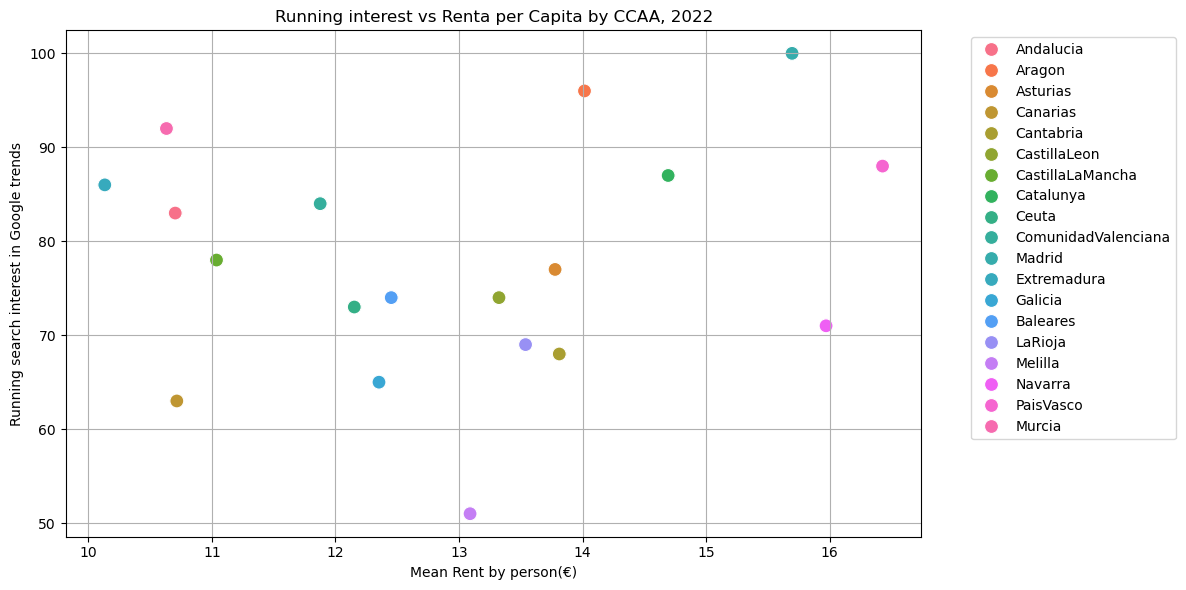

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#1 year selected to make an example
year_selected = 2022
df_year = running_dataset[running_dataset["Año"] == year_selected]

# Make the graphic
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_year,
    x="Renta neta media por persona",
    y="busquedas_running",
    hue="CCAA",
    s=100,
)

plt.title(f"Running interest vs Renta per Capita by CCAA, {year_selected}")
plt.xlabel("Mean Rent by person(€)")
plt.ylabel("Running search interest in Google trends")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


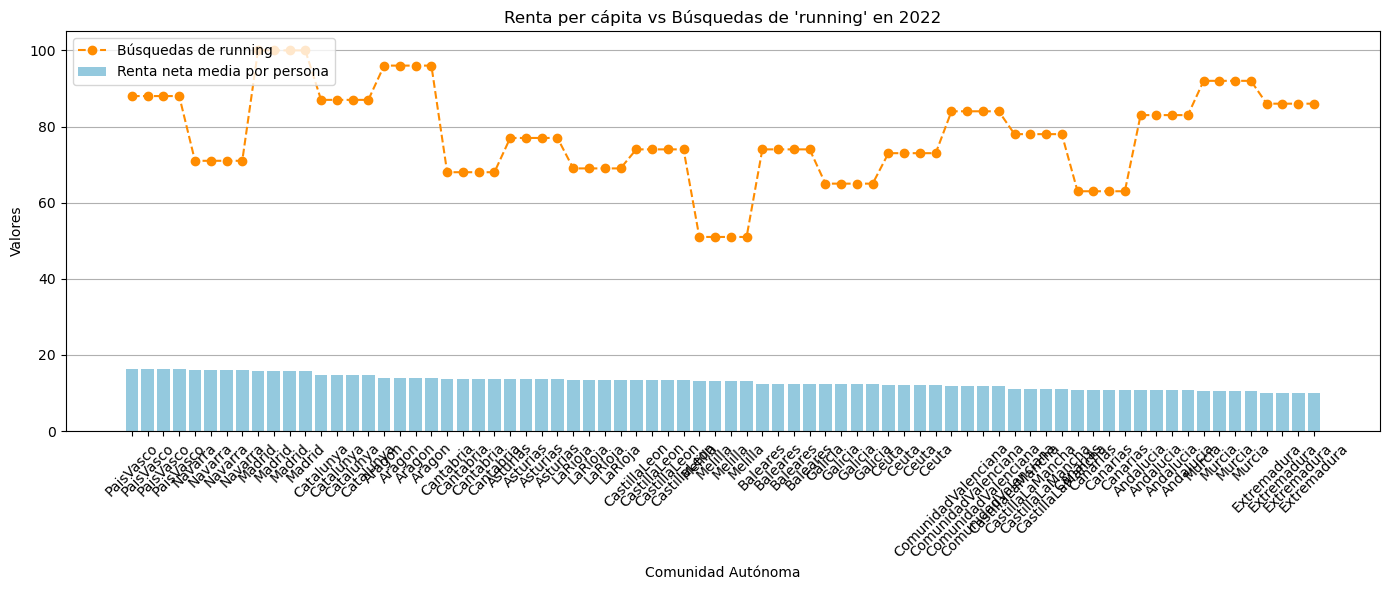

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegimos año
year_selected = 2022
df_year = running_dataset[running_dataset["Año"] == year_selected].copy()

# Ordenamos por renta per cápita para una visual más limpia
df_year = df_year.sort_values("Renta neta media por persona", ascending=False)

# Tamaño del gráfico
plt.figure(figsize=(14, 6))

# Eje X: posiciones y etiquetas
x = range(len(df_year))
ccaa_labels = df_year["CCAA"]

# Gráfico de barras: renta per cápita
sns.barplot(
    x=x,
    y="Renta neta media por persona",
    data=df_year,
    color='skyblue',
    label="Renta neta media por persona"
)

# Línea de puntos: búsquedas de running
plt.plot(x, df_year["busquedas_running"], 'o--', color='darkorange', label="Búsquedas de running")
plt.xticks(ticks=x, labels=ccaa_labels, rotation=45)

# Títulos y leyenda
plt.title(f"Renta per cápita vs Búsquedas de 'running' en {year_selected}")
plt.xlabel("Comunidad Autónoma")
plt.ylabel("Valores")
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar
plt.show()


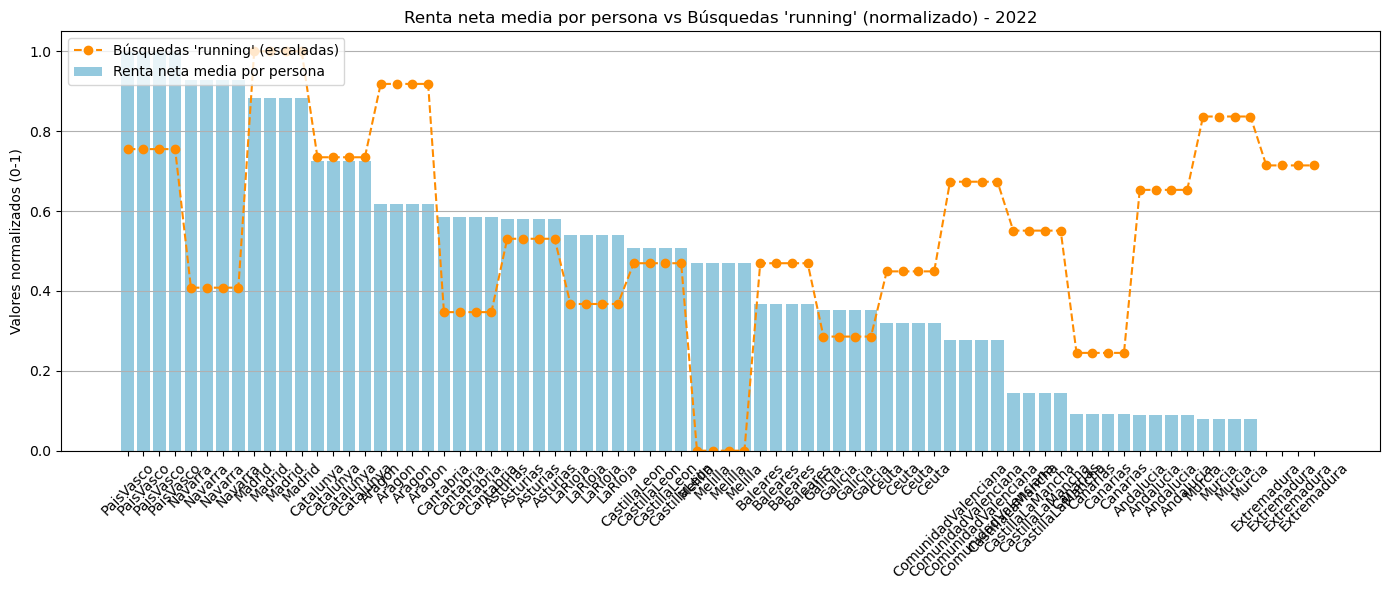

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Creamos un nuevo dataframe con copia
df_year_scaled = df_year.copy()

# Normalizamos ambas columnas entre 0 y 1
scaler = MinMaxScaler()
df_year_scaled[["Renta neta media por persona", "busquedas_running"]] = scaler.fit_transform(
    df_year_scaled[["Renta neta media por persona", "busquedas_running"]]
)

# Gráfico combinado escalado
plt.figure(figsize=(14, 6))
x = range(len(df_year_scaled))
ccaa_labels = df_year_scaled["CCAA"]

# Barras para renta escalada
sns.barplot(x=x, y="Renta neta media por persona", data=df_year_scaled, color='skyblue', label="Renta neta media por persona")

# Línea de puntos para búsquedas escaladas
plt.plot(x, df_year_scaled["busquedas_running"], 'o--', color='darkorange', label="Búsquedas 'running' (escaladas)")

# Ejes y formato
plt.xticks(ticks=x, labels=ccaa_labels, rotation=45)
plt.title(f"Renta neta media por persona vs Búsquedas 'running' (normalizado) - {year_selected}")
plt.ylabel("Valores normalizados (0-1)")
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


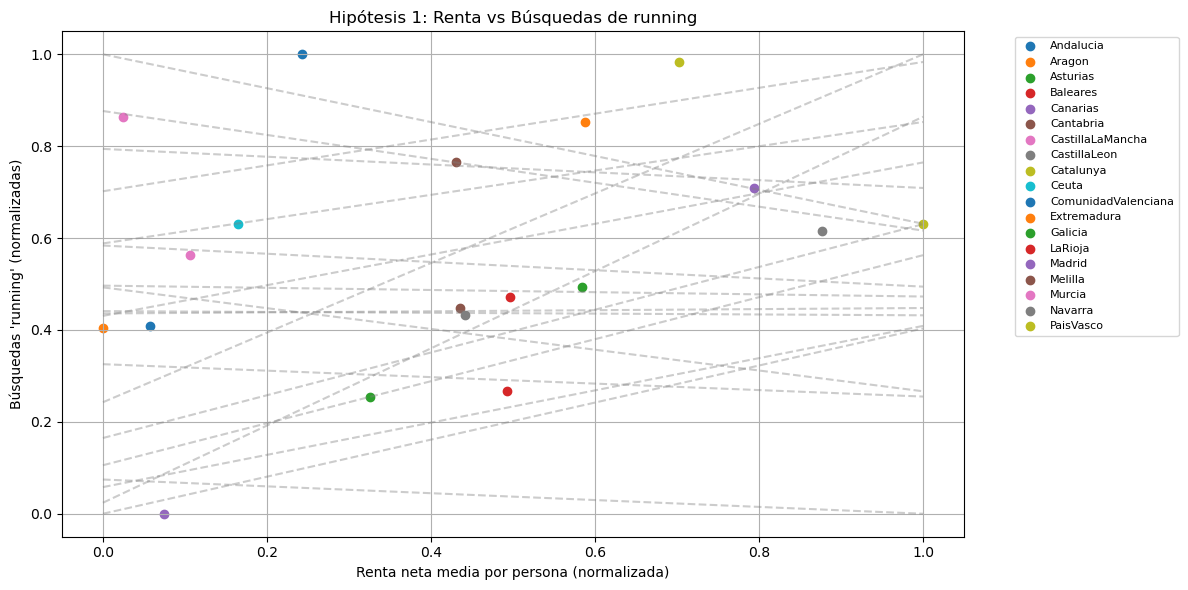

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

# Cargar el dataset (modifica la ruta si es necesario)
running_trends = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\running-trends-dataset.csv", sep=";")

# Eliminar duplicados
running_trends = running_trends.drop_duplicates(subset=["Año", "CCAA"])

# ------------------ HIPÓTESIS 1 ------------------f1 = running_trends[["Año", "CCAA", "Renta neta media por persona", "busquedas_running"]].dropna()
h1 = running_trends.groupby("CCAA", as_index=False).mean()

# Normalización
scaler = MinMaxScaler()
h1[["Renta neta media por persona", "busquedas_running"]] = scaler.fit_transform(
    h1[["Renta neta media por persona", "busquedas_running"]]
)

# Gráfico Hipótesis 1
plt.figure(figsize=(12, 6))
for _, row in h1.iterrows():
    plt.plot([0, 1], [row["Renta neta media por persona"], row["busquedas_running"]],
             linestyle="--", alpha=0.4, color="gray")
    plt.scatter(row["Renta neta media por persona"], row["busquedas_running"], label=row["CCAA"])

plt.xlabel("Renta neta media por persona (normalizada)")
plt.ylabel("Búsquedas 'running' (normalizadas)")
plt.title("Hipótesis 1: Renta vs Búsquedas de running")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

plt.savefig("hipotesis1.png", dpi=300)


*2.Communities with the highest unemployment rate have more running events*


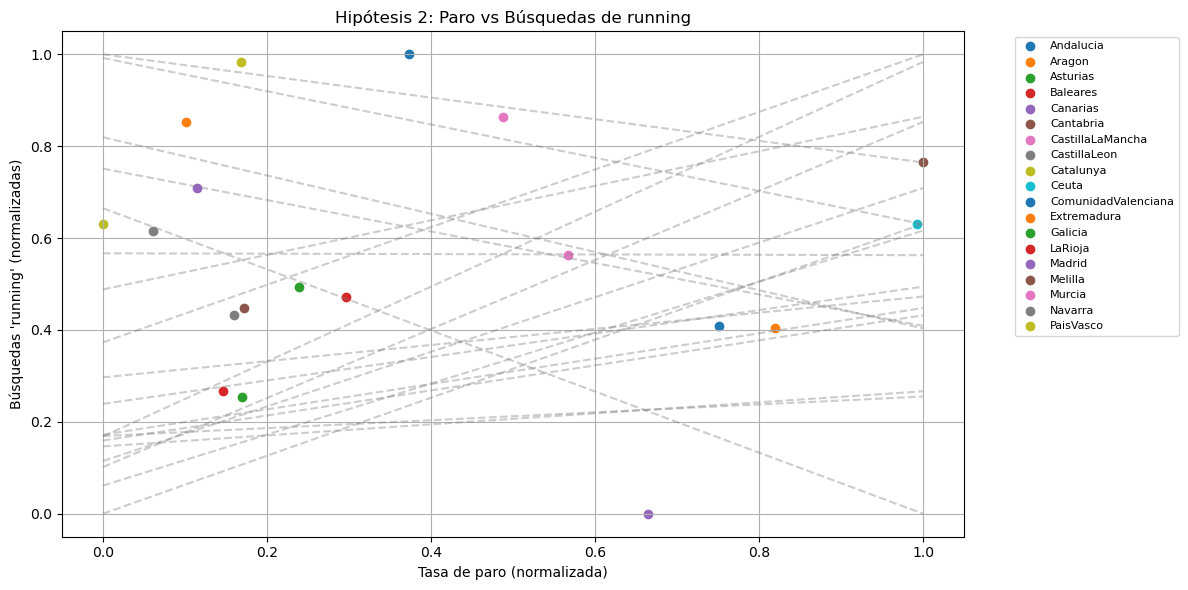

<Figure size 640x480 with 0 Axes>

In [9]:
# ------------------ HIPÓTESIS 2 ------------------
h2 = running_trends[["Año", "CCAA", "Total_paro", "busquedas_running"]].dropna()
h2 = h2.groupby("CCAA", as_index=False).mean()

# Normalización
h2[["Total_paro", "busquedas_running"]] = scaler.fit_transform(
    h2[["Total_paro", "busquedas_running"]]
)

# Gráfico Hipótesis 2
plt.figure(figsize=(12, 6))
for _, row in h2.iterrows():
    plt.plot([0, 1], [row["Total_paro"], row["busquedas_running"]],
             linestyle="--", alpha=0.4, color="gray")
    plt.scatter(row["Total_paro"], row["busquedas_running"], label=row["CCAA"])

plt.xlabel("Tasa de paro (normalizada)")
plt.ylabel("Búsquedas 'running' (normalizadas)")
plt.title("Hipótesis 2: Paro vs Búsquedas de running")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

plt.savefig("hipotesis2.png", dpi=300)


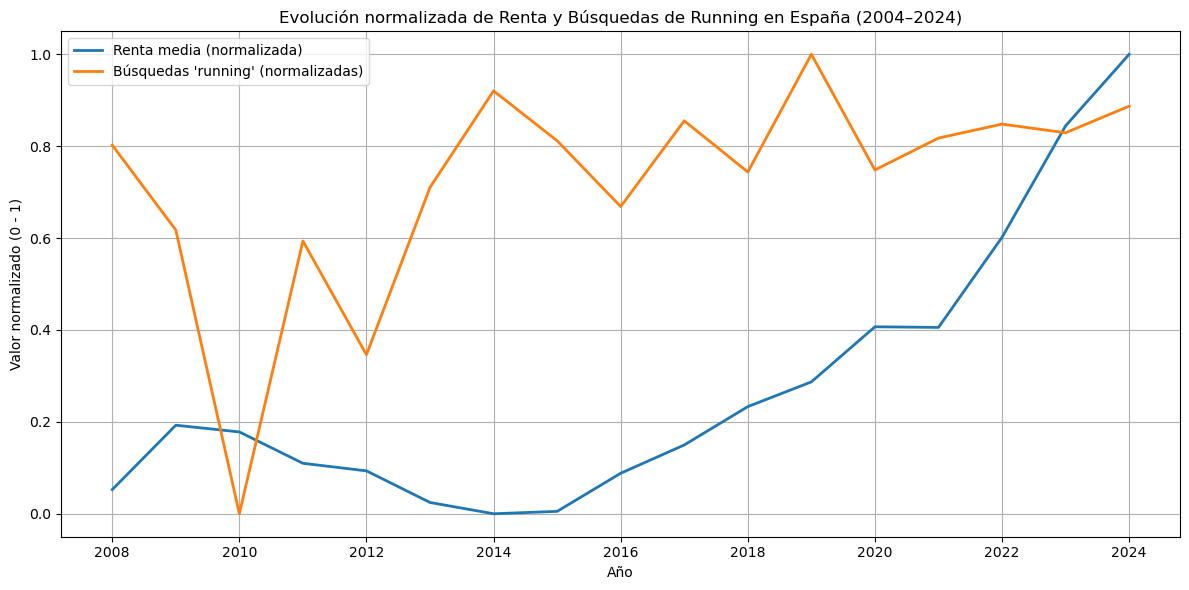

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Cargar tu dataset (ajusta la ruta si hace falta)
running_trends = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\running-trends-dataset.csv", sep=";")

# Quitar duplicados por seguridad
running_trends.drop_duplicates(subset=["Año", "CCAA"])

# Agrupar por año y calcular la media nacional
ev_rent = running_trends.groupby("Año")[["Renta neta media por persona", "busquedas_running"]].mean().dropna()

# Normalizar los valores para llevarlos a la misma escala (0 a 1)
scaler = MinMaxScaler()
norm_ev_rent = ev_rent.copy()
norm_ev_rent[["Renta neta media por persona", "busquedas_running"]] = scaler.fit_transform(
    ev_rent[["Renta neta media por persona", "busquedas_running"]]
)

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=norm_ev_rent, x=norm_ev_rent.index, y="Renta neta media por persona", label="Renta media (normalizada)", linewidth=2)
sns.lineplot(data=norm_ev_rent, x=norm_ev_rent.index, y="busquedas_running", label="Búsquedas 'running' (normalizadas)", linewidth=2)

# Personalización
plt.title("Evolución normalizada de Renta y Búsquedas de Running en España (2004–2024)")
plt.xlabel("Año")
plt.ylabel("Valor normalizado (0 - 1)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Mean stats:
Mean: 11.58 €
Median: 11.72 €
Mode: 9.07 €
Quantile:
0.25     9.892382
0.50    11.719235
0.75    12.631676
Name: Renta neta media por persona, dtype: float64


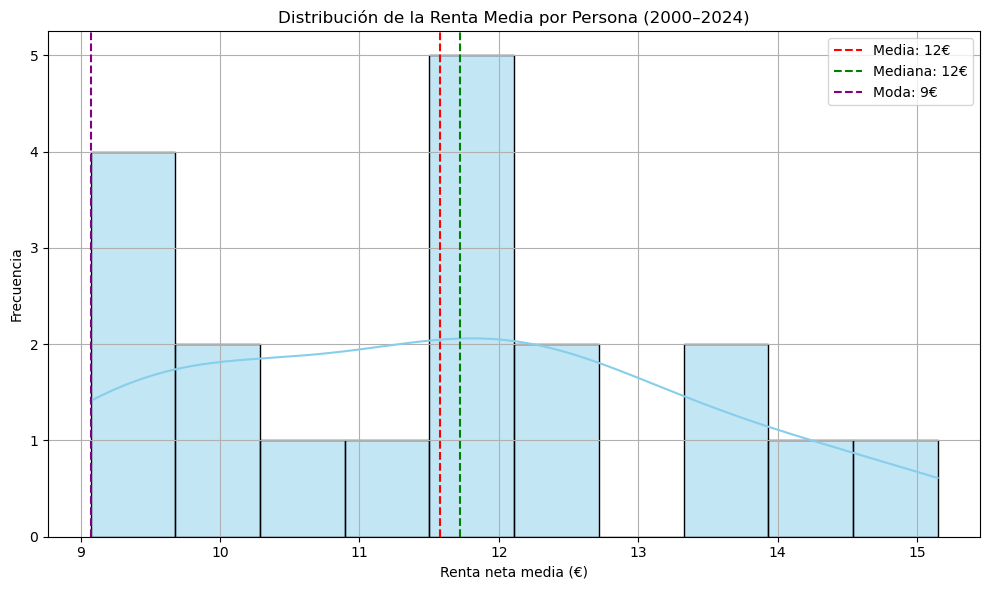

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la renta media por CCAA entre 2000 y 2024
renta_stats = running_trends.groupby("CCAA", as_index=False)["Renta neta media por persona"].mean()

# Calcular estadísticas
mean = renta_stats["Renta neta media por persona"].mean()
median = renta_stats["Renta neta media por persona"].median()
mode = renta_stats["Renta neta media por persona"].mode()[0]
quantile = renta_stats["Renta neta media por persona"].quantile([0.25, 0.5, 0.75])

# Mostrar estadísticas por consola
print("Mean stats:")
print(f"Mean: {mean:.2f} €")
print(f"Median: {median:.2f} €")
print(f"Mode: {mode:.2f} €")
print("Quantile:")
print(quantile)

# Crear gráfico de distribución con líneas de media, mediana y moda
plt.figure(figsize=(10, 6))
sns.histplot(renta_stats["Renta neta media por persona"], bins=10, kde=True, color='skyblue')

# Líneas de referencia
plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.0f}€")
plt.axvline(median, color='green', linestyle='--', label=f"Median: {median:.0f}€")
plt.axvline(mode, color='purple', linestyle='--', label=f"Mode: {mode:.0f}€")

# Personalización
plt.title("Distribución de la Renta Media por Persona (2000–2024)")
plt.xlabel("Renta neta media (€)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Calcular la media de renta por CCAA entre 2000–2024
mean_rent = running_dataset.groupby("CCAA", as_index=False)["Renta neta media por persona"].mean()

# Clasificar en grupos según los valores estadísticos obtenidos previamente
def rent_classif (mean_rent):
    if mean_rent < 11_577:
        return "Baja"
    elif 11_577 <= mean_rent <= 12_632:
        return "Media"
    else:
        return "Alta"

# Aplicar clasificación
mean_rent["Grupo_Renta"] = mean_rent["Renta neta media por persona"].apply(rent_classif)

# Agrupar y mostrar la lista de CCAA por grupo
groups_rent = mean_rent.groupby("Grupo_Renta")["CCAA"].apply(list).reset_index(name="CCAA")

# Mostrar tabla final
print("📊 CCAA grouped by level of rent:")
display(groups_rent)


NameError: name 'running_dataset' is not defined